The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
100
[[0.74780059 1.49560117 2.24340176 ... 1.9941349  2.74193548 2.24340176]
 [2.24340176 0.99706745 2.49266862 ... 1.49560117 3.73900293 2.24340176]
 [2.24340176 1.9941349  1.9941349  ... 1.9941349  2.49266862 1.74486804]
 ...
 [4.23753666 1.9941349  2.74193548 ... 3.24046921 3.73900293 2.99120235]
 [4.98533724 3.24046921 3.73900293 ... 2.49266862 3.98826979 2.99120235]
 [3.48973607 4.23753666 3.24046921 ... 2.74193548 2.74193548 2.99120235]]


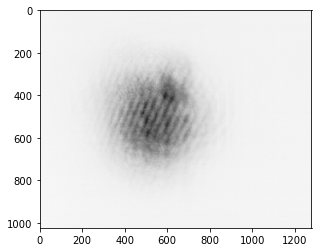

34.14956011730205


In [11]:
%load_ext autoreload
%autoreload 2

import Components as comp
import matplotlib.pyplot as plt
import numpy as np


with comp.Thor_Camera(100,1999994, measure=True, max_frames = 1 ) as camera:
    camera.change_exposure(100)
    print(camera.get_exposure())
    img = camera.get_image()
    print(img)
    plt.imshow(img,cmap = 'Greys')
    plt.show()
    print(np.amax(img))

In [1]:
%load_ext autoreload
%autoreload 2


import Components as comp
import socket
import sys

if socket.gethostname() == "ph-photonbec5":
    sys.path.append(r"D:/Control/PythonPackages/")

components = dict()


filter_wheel = comp.FilterWheel(allowed_filter_positions=[0,1,2,3,4,5])

In [7]:
%load_ext autoreload
%autoreload 2

import numpy as np
import Components as comp
import time
import socket
import sys

if socket.gethostname() == "ph-photonbec5":
    sys.path.append("D:/Control/PythonPackages/")
    sys.path.append("D:/Control/PiezoController/")

    
from pbec_analysis import make_timestamp,ExperimentalDataSet, CameraData

def save_image(image,stage_position,exposure_time):
    timestamp = make_timestamp(precision=0)
    dataset = ExperimentalDataSet(timestamp)
    camera_data = CameraData(timestamp,extension='_' + str(round(stage_position)) + '_' + str(int(exposure_time)) + '_' + str(np.amax(image)) + '_single' + '.png')
    camera_data.data = image
    dataset.dataset["CavityCamera" + str(stage_position) + str(exposure_time) + str(np.amax(image))+ 'single'] = camera_data
    dataset.saveAllData()
    time.sleep(0.2)

def exposition_check(image_list): #FOR BOOLEEAN
    overexposed = 0
    good_pics = 0
    underexposed = 0
    bad_pics = 0
    exposition_change = 0
    for k in range(len(image_list)):
        if np.amax(image_list[k]) == 255.0:
            overexposed += 1
            bad_pics += 1
        if np.amax(image_list[k]) < 255.0 and np.amax(image_list[k]) > 60:
            good_pics += 1
        if np.amax(image_list[k]) <= 60.0:
            underexposed += 1
            bad_pics += 1
        if bad_pics >= good_pics :
            if overexposed >= round(bad_pics/2):
                exposition_change = 1 #DECREASE EXPOSURE
            if underexposed >= round(bad_pics/2):
                exposition_change = 2 #INCREASE EXPOSURE
    result_list = [exposition_change, good_pics, bad_pics, overexposed, underexposed]
    return result_list



position_list = np.arange(221,90,-1)
number_of_pics_verif = 10
min_exp = 100
max_exp = 1999994
standard_exp = 50000
number_of_pics = 5

# with comp.Thor_Camera(min_exp, max_exp, measure=True, max_frames=1) as camera:
#     camera.change_exposure(min_exp)
#     testlist = camera.get_multiple_images(number_of_pics)
#     print(exposition_check(testlist))


with comp.Thor_Camera(min_exp, max_exp, measure=True, max_frames=1) as camera:
    with comp.Translation_Stage() as stage:

        for k in range(len(position_list)):
            filter_wheel.reset()
            stage.set(position_list[k])
            camera.change_exposure(min_exp)
            position = stage.get_position()
            exposure = camera.get_exposure()
            iteration = 0
            print('Now at Position : ', position)

            # print('Starting verification')
            verification_img_list = camera.get_multiple_images(number_of_pics_verif)

            while exposition_check(verification_img_list)[0] != 0:
                # print('Need to readjust parameters, iteration :', iteration)
                verification_img_list = camera.get_multiple_images(number_of_pics)
                verification = exposition_check(verification_img_list)[0]
                if verification == 1:
                    # print('need to decrease exposure')
                    camera.change_exposure(exposure * 0.1)
                    exposure = camera.get_exposure()

                    if exposure <= min_exp:
                        # print('Minimum exposure reached, increasing filter')
                        filter_wheel.increase_filter()
                        camera.change_exposure(min_exp)

                if verification == 2:
                    #print('need to increase exposure')
                    camera.change_exposure(exposure * 1.4)
                    exposure = camera.get_exposure()
                    if exposure >= max_exp:
                        #print('Maximum exposure reached, decreasing filter')
                        filter_wheel.reset()
                        camera.change_exposure(standard_exp)

                iteration += 1

            #print('exposition checked for position :', position)

            for k in range(number_of_pics):
                img = camera.get_image()
                save_image(img, position, exposure)
                #time.sleep(0.05)
                #print('pic num. : ', k, 'for position :', position)




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Now at Position :  220.9979
Now at Position :  220.0
Now at Position :  219.0
Now at Position :  218.0
Now at Position :  217.0
Now at Position :  216.0


Exception: Max ND filter reached

In [53]:
for k in range(len(testlist)):
    print(np.amax(testlist[k]))

162.0234604105572
74.03225806451613
106.68621700879766
89.48680351906158
69.79472140762464
104.44281524926686
118.90029325513197
88.73900293255132
91.73020527859238
130.36656891495602
